# [CDAF] Atividade 2

## Nome e matrícula
Nome: Júlio Guerra Domingues
Matrícula: 2022431280

Nome: Leandro Luiz Duarte Teixeira
Matrícula: 2024006099

## Introdução
Nesta atividade, vamos revisar os conceitos aprendidos em sala de aula sobre estatísticas agregadas. Para esta atividade, usaremos dados do Brasileirão 2023 do FBRef.

## Questão 1
- Acesse os dados em https://fbref.com/en/comps/24/2023/schedule/2023-Serie-A-Scores-and-Fixtures
- Crie uma média móvel de 5 jogos, para cada equipe, de cada uma das seguintes estatísticas: xG pró, xG contra, e diferença de xG.
- Escolha 4 times para visualizar a série temporal das estatísticas acima. Uma visualização para cada uma das estatísticas, onde a média geral do campeonato é apresentada com uma linha pontilhada em conjunto com a média móvel dos times escolhidos.
- Interprete os resultados. O que isso pode indicar sobre a qualidade ofensiva e defensiva dos times escolhidos?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://fbref.com/en/comps/24/2023/schedule/2023-Serie-A-Scores-and-Fixtures"

tables = pd.read_html(url)
print(tables[0])

       Wk  Day        Date   Time           Home   xG Score  xG.1  \
0     1.0  Sat  2023-04-15  16:00      Palmeiras  3.0   2–1   1.0   
1     1.0  Sat  2023-04-15  16:00   América (MG)  1.1   0–3   3.1   
2     1.0  Sat  2023-04-15  18:30      Fortaleza  1.5   1–1   0.9   
3     1.0  Sat  2023-04-15  18:30  Botafogo (RJ)  0.9   2–1   2.0   
4     1.0  Sat  2023-04-15  18:30  RB Bragantino  2.0   2–1   0.7   
..    ...  ...         ...    ...            ...  ...   ...   ...   
421  38.0  Wed  2023-12-06  21:30  Internacional  1.2   3–1   0.4   
422  38.0  Wed  2023-12-06  21:30     Fluminense  2.4   2–3   2.4   
423  38.0  Wed  2023-12-06  21:30         Santos  1.0   1–2   1.2   
424  38.0  Wed  2023-12-06  21:30      São Paulo  0.5   1–0   0.5   
425  38.0  Wed  2023-12-06  21:30       Cruzeiro  1.6   1–1   1.4   

              Away  Attendance                               Venue  \
0           Cuiabá     35835.0                      Allianz Parque   
1       Fluminense      6653.0 

In [2]:
# Carregar os dados
url = "https://fbref.com/en/comps/24/2023/schedule/2023-Serie-A-Scores-and-Fixtures"
df = pd.read_html(url)[0]

df.columns = ["Wk", "Day", "Date", "Time", "Home", "xG_Home", "Score", "xG_Away",
              "Away", "Attendance", "Venue", "Referee", "Match_Report", "Notes"]

# Converter a data para formato datetime
df["Date"] = pd.to_datetime(df["Date"])

# Criar as estatísticas de xG
df["xG Diff Home"] = df["xG_Home"] - df["xG_Away"]
df["xG Diff Away"] = df["xG_Away"] - df["xG_Home"]

# Empilhar os dados para facilitar o cálculo da média móvel
home_stats = df[["Date", "Home", "xG_Home", "xG_Away", "xG Diff Home"]].rename(
    columns={"Home": "Team", "xG_Home": "xG For", "xG_Away": "xG Against", "xG Diff Home": "xG Diff"}
)

away_stats = df[["Date", "Away", "xG_Away", "xG_Home", "xG Diff Away"]].rename(
    columns={"Away": "Team", "xG_Away": "xG For", "xG_Home": "xG Against", "xG Diff Away": "xG Diff"}
)

# Concatenar os dados
all_stats = pd.concat([home_stats, away_stats]).sort_values(by=["Team", "Date"])

In [3]:
#  Média móvel de 5 jogos
all_stats["xG For MA"] = all_stats.groupby("Team")["xG For"].transform(lambda x: x.rolling(5, min_periods=1).mean())
all_stats["xG Against MA"] = all_stats.groupby("Team")["xG Against"].transform(lambda x: x.rolling(5, min_periods=1).mean())
all_stats["xG Diff MA"] = all_stats.groupby("Team")["xG Diff"].transform(lambda x: x.rolling(5, min_periods=1).mean())

In [4]:
# Escolha de 4 times para análise
teams = ["Atlético Mineiro", "Palmeiras", "Vasco da Gama", "Grêmio"]

# Média geral do campeonato
league_avg_xG = all_stats.groupby("Date")[["xG For", "xG Against", "xG Diff"]].mean().rolling(5, min_periods=1).mean()

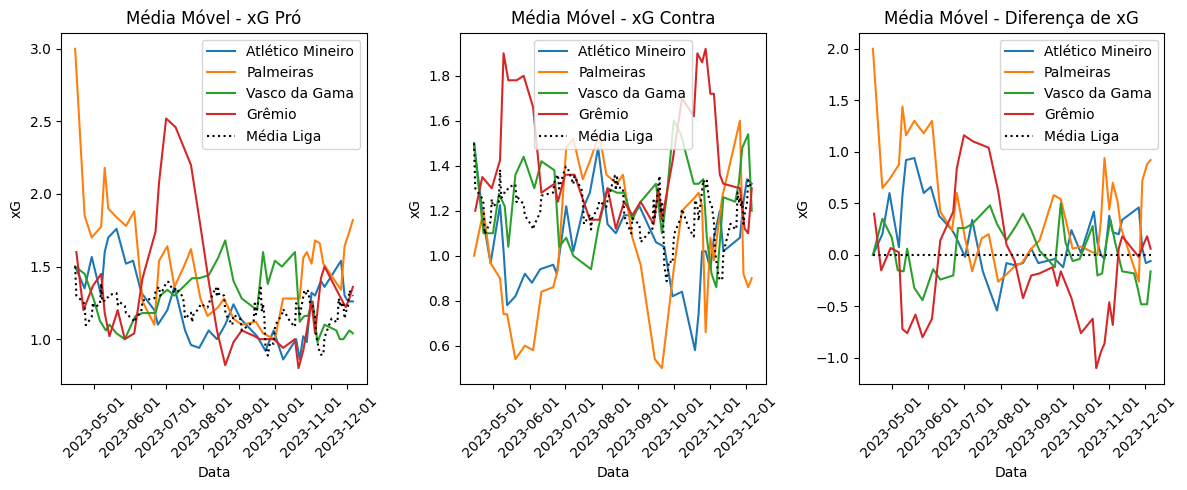

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(12, 5))

# Plot xG For
plt.subplot(1, 3, 1)
for team in teams:
    team_data = all_stats[all_stats["Team"] == team]
    plt.plot(team_data["Date"], team_data["xG For MA"], label=team)
plt.plot(league_avg_xG.index, league_avg_xG["xG For"], linestyle="dotted", color="black", label="Média Liga")
plt.title("Média Móvel - xG Pró")
plt.xlabel("Data")
plt.ylabel("xG")
plt.legend()
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Exibir um rótulo por mês

# Plot xG Against
plt.subplot(1, 3, 2)
for team in teams:
    team_data = all_stats[all_stats["Team"] == team]
    plt.plot(team_data["Date"], team_data["xG Against MA"], label=team)
plt.plot(league_avg_xG.index, league_avg_xG["xG Against"], linestyle="dotted", color="black", label="Média Liga")
plt.title("Média Móvel - xG Contra")
plt.xlabel("Data")
plt.ylabel("xG")
plt.legend()
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

# Plot xG Difference
plt.subplot(1, 3, 3)
for team in teams:
    team_data = all_stats[all_stats["Team"] == team]
    plt.plot(team_data["Date"], team_data["xG Diff MA"], label=team)
plt.plot(league_avg_xG.index, league_avg_xG["xG Diff"], linestyle="dotted", color="black", label="Média Liga")
plt.title("Média Móvel - Diferença de xG")
plt.xlabel("Data")
plt.ylabel("xG")
plt.legend()
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.tight_layout()
plt.show()

### Séries temporais - média móvel 5 jogos

A análise dos indicadores de xG ao longo do campeonato revela tendências claras sobre o desempenho das equipes escolhidas. O Palmeiras mostrou um bom equilíbrio entre ataque e defesa, mantendo sua diferença de xG positiva na maior parte da competição. O Grêmio, apesar de criar muitas chances, apresentou vulnerabilidades defensivas que podem ter comprometido sua consistência. O Atlético Mineiro oscilou entre bons momentos defensivos e dificuldades ofensivas, mantendo-se próximo à média da liga. Já o Vasco da Gama teve dificuldades tanto na criação de chances quanto na proteção defensiva, refletindo uma campanha mais instável. Esses padrões sugerem que um alto xG pró, aliado a um xG contra controlado, é essencial para uma campanha bem-sucedida, enquanto equipes que concedem muitas oportunidades ao adversário tendem a enfrentar mais dificuldades ao longo da temporada.

## Questão 2
- Agora repita a questão 1, plotando as séries temporais dos mesmos times, mas para uma janela móvel de 10 jogos.
- Quais as diferenças entre as séries temporais de 5 e 10 jogos? Em quais situações pode ser vantajoso escolher uma janela ao invés da outra?

In [6]:
# Criando colunas de média móvel de 10 jogos
window_size = 10
all_stats["xG For MA_10"] = all_stats.groupby("Team")["xG For"].transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())
all_stats["xG Against MA_10"] = all_stats.groupby("Team")["xG Against"].transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())
all_stats["xG Diff MA_10"] = all_stats.groupby("Team")["xG Diff"].transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())

# Criando a média da liga
league_avg_xG["xG For MA_10"] = league_avg_xG["xG For"].rolling(window=window_size, min_periods=1).mean()
league_avg_xG["xG Against MA_10"] = league_avg_xG["xG Against"].rolling(window=window_size, min_periods=1).mean()
league_avg_xG["xG Diff MA_10"] = league_avg_xG["xG Diff"].rolling(window=window_size, min_periods=1).mean()

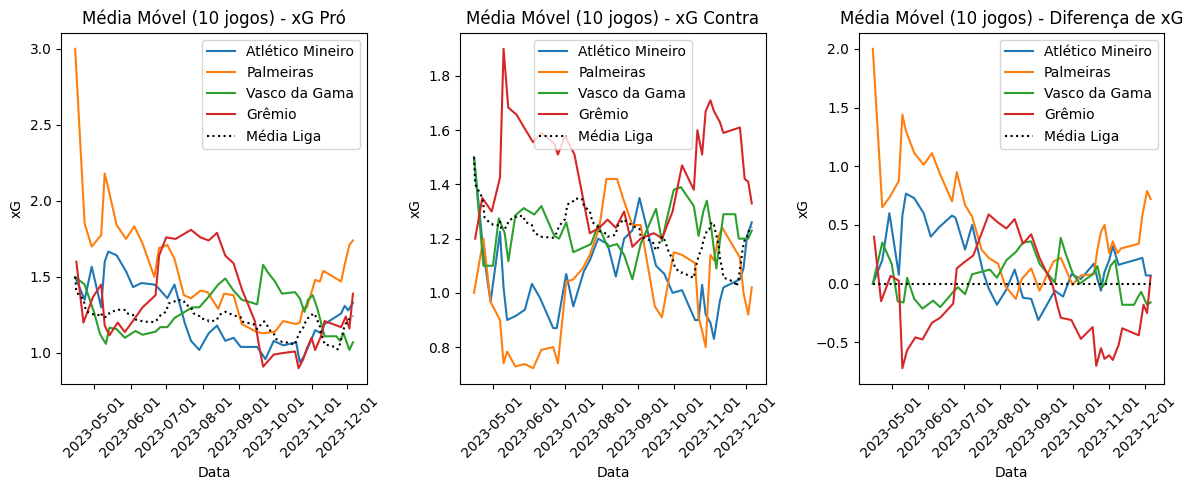

In [7]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(12, 5))

# Plot xG For
plt.subplot(1, 3, 1)
for team in teams:
    team_data = all_stats[all_stats["Team"] == team]
    plt.plot(team_data["Date"], team_data["xG For MA_10"], label=team)
plt.plot(league_avg_xG.index, league_avg_xG["xG For MA_10"], linestyle="dotted", color="black", label="Média Liga")
plt.title("Média Móvel (10 jogos) - xG Pró")
plt.xlabel("Data")
plt.ylabel("xG")
plt.legend()
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

# Plot xG Against
plt.subplot(1, 3, 2)
for team in teams:
    team_data = all_stats[all_stats["Team"] == team]
    plt.plot(team_data["Date"], team_data["xG Against MA_10"], label=team)
plt.plot(league_avg_xG.index, league_avg_xG["xG Against MA_10"], linestyle="dotted", color="black", label="Média Liga")
plt.title("Média Móvel (10 jogos) - xG Contra")
plt.xlabel("Data")
plt.ylabel("xG")
plt.legend()
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

# Plot xG Difference
plt.subplot(1, 3, 3)
for team in teams:
    team_data = all_stats[all_stats["Team"] == team]
    plt.plot(team_data["Date"], team_data["xG Diff MA_10"], label=team)
plt.plot(league_avg_xG.index, league_avg_xG["xG Diff MA_10"], linestyle="dotted", color="black", label="Média Liga")
plt.title("Média Móvel (10 jogos) - Diferença de xG")
plt.xlabel("Data")
plt.ylabel("xG")
plt.legend()
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.tight_layout()
plt.show()

### Séries temporais - média móvel 10 jogos
Diferenças entre as séries temporais de 5 e 10 jogos
	1.	Suavização dos dados: A média móvel de 10 jogos apresenta curvas mais suaves e menos flutuações do que a de 5 jogos. Isso ocorre porque um intervalo maior reduz o impacto de variações extremas.
	2.	Tempo de resposta: A janela de 5 jogos responde mais rapidamente a mudanças de desempenho (por exemplo, uma sequência ruim ou boa de partidas). Já a de 10 jogos suaviza essas variações, mostrando uma tendência mais estável.
	3.	Destaque para tendências: A média móvel de 10 jogos destaca melhor padrões de longo prazo, enquanto a de 5 jogos pode capturar melhor oscilações recentes.

Média móvel de 5 jogos:
	•	Se o objetivo for capturar mudanças recentes no desempenho do time.
	•	Para análises de curto prazo, como avaliar o impacto de uma mudança tática ou um novo jogador.

Média móvel de 10 jogos:
	•	Quando se deseja evitar ruídos e entender tendências gerais.
	•	Para comparações de desempenho ao longo da temporada sem se preocupar com oscilações de curto prazo.

## Questão 3
- Vá para o link
-- https://fbref.com/en/comps/24/2023/stats/2023-Serie-A-Stats
- Nesta seção de estatísticas, é possível navegar por estatísticas específicas para diferentes aspectos do jogo (finalização, passe, defesa, etc.). Para todos exercícios a partir deste, você terá que selecionar aquelas que julgar mais relevantes para responder as questões.
- Monte um radar plot com 6 atributos relevantes para atacantes e compare 3 jogadores de sua escolha. Justifique a escolha de cada um dos atributos, a escolha da escala dos radares e o tipo de normalização. Interprete os resultados dos radares em termos das qualidades e limitações dos jogadores.
- Ref Soccermatics:
-- https://soccermatics.readthedocs.io/en/latest/lesson3/ScoutingPlayers.html
-- https://soccermatics.readthedocs.io/en/latest/gallery/lesson3/plot_RadarPlot.html

Para atacantes: xG,
Gols, assistência, gols não penalti, PRGr (Passe progressivo recebido),
xG,	npxG, npxG+xAG, PRGr,

Escolhidos:
xG/90 --> 'xG.1'
xAG/90 --> 'xAG.1'
npxG/90 --> 'npxG.1'
npxG+xAG/90 - 'npxG+xAG.1'
90s -->'90s'
PRGr/90s --> 'PrgR'
Talvez conversao de penaltis

PK, PKatt

Meio campistas:
	PrgC --> 'PrgC'
  PrgP	--> 'PrgP'
  PrgR --> 'PrgR' todos. /90
  xAG / 90
  CrdY --> 'CrdY'
  90s --> '90s'
  
Defesa
	PrgC	PrgP	 todos. /90
  CrdY
  CrdR --> 'CrdR'
  xG --> 'xG'
  90s --> '90s'

Normalização: baseado no maior valor dentre os jogadores da posição
Escala: pensar

'90s'

Posicoes separadas por vírgula --> utilizar contain

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carregar dados
!wget https://github.com/juliogdomingues/cdaf_ufmg/raw/refs/heads/main/At2/BR24PLAYERS.txt
df = pd.read_csv('BR24PLAYERS.txt', sep='\t', encoding='utf-8', skiprows=2)
df.columns

--2025-03-31 17:34:19--  https://github.com/juliogdomingues/cdaf_ufmg/raw/refs/heads/main/At2/BR24PLAYERS.txt
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/juliogdomingues/cdaf_ufmg/refs/heads/main/At2/BR24PLAYERS.txt [following]
--2025-03-31 17:34:19--  https://raw.githubusercontent.com/juliogdomingues/cdaf_ufmg/refs/heads/main/At2/BR24PLAYERS.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116765 (114K) [text/plain]
Saving to: ‘BR24PLAYERS.txt.1’

BR24PLAYERS.txt.1   100%[===================>] 114.03K  --.-KB/s    in 0.03s   

2025-03-31 17:34:20 (4.40 MB/s) - ‘BR24PLAYERS.txt.1’ saved [

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', 'MP', 'Starts',
       'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY',
       'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR',
       'Gls.1', 'Ast.1', 'G+A.1', 'G-PK.1', 'G+A-PK', 'xG.1', 'xAG.1',
       'xG+xAG', 'npxG.1', 'npxG+xAG.1', 'Matches'],
      dtype='object')

In [9]:
def filter_and_normalize(df, target_columns, position, target_players, drop = 0.05):
  new_df = df.copy()

  # Filtrar por posição
  df_position = df[df['Pos'].str.contains(position, na=False)].copy()[["Player", "Min"] + numeric_cols]

  # Para garantir qualidade dos dados, remover do cálculo jogadores que jogaram pouco
  df_position_filtered = df_position.copy()

  df_position_filtered['Min'] = df_position_filtered['Min'].str.replace(',', '').apply(int)
  min_minutes = df_position_filtered['Min'].max() * drop
  df_position_filtered = df_position_filtered[df_position_filtered['Min'] >= min_minutes]

  # Selecionar jogadores desejados
  df_selected = df_position[df_position['Player'].isin(target_players)][["Player"] + numeric_cols]

  # Normalização através de percentis
  df_normalized = df_selected.copy()[numeric_cols]
  for col in numeric_cols:
      df_normalized[col] = df_selected[col].apply(lambda x: percentileofscore(df_position_filtered[col], x, kind='weak')/100)

  return df_selected, df_normalized

Dados brutos dos jogadores selecionados:
           Player  xG.1  xAG.1  npxG.1  npxG+xAG.1   90s  PrgR
9    Yuri Alberto  0.44   0.08    0.34        0.42  24.4   172
12     Alerrandro  0.41   0.11    0.30        0.40  26.5    87
313          Hulk  0.45   0.09    0.26        0.36  21.0   143

Dados normalizados:
         xG.1     xAG.1    npxG.1  npxG+xAG.1       90s      PrgR
9    0.916667  0.368421  0.872807    0.798246  0.921053  0.947368
12   0.890351  0.539474  0.824561    0.771930  0.951754  0.631579
313  0.938596  0.425439  0.771930    0.666667  0.837719  0.877193


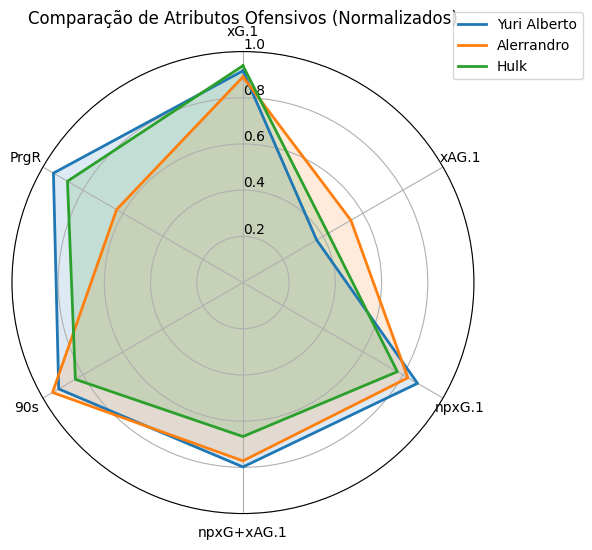

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import percentileofscore

# Definir colunas numéricas
numeric_cols = ['xG.1', 'xAG.1', 'npxG.1', 'npxG+xAG.1', '90s', 'PrgR']
position = 'FW'
target_players = ['Yuri Alberto', 'Alerrandro', 'Hulk']

df_selected, df_normalized = filter_and_normalize(df, numeric_cols, position, target_players)

# Verificação
print("Dados brutos dos jogadores selecionados:")
print(df_selected)

# Verificação dos dados normalizados
print("\nDados normalizados:")
print(df_normalized)

# Radar Plot ---
categories = numeric_cols
N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]  # Fechar o círculo

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, polar=True)
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories, fontsize=10)
ax.set_rlabel_position(0)
plt.ylim(0, 1)  # Limite fixo

# Plotar cada jogador
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
for idx, (_, row) in enumerate(df_normalized.iterrows()):
    values = row.tolist()
    values += values[:1]  # Repetir o primeiro valor para fechar o gráfico
    ax.plot(angles, values, color=colors[idx], linewidth=2, label=df_selected.iloc[idx]['Player'])
    ax.fill(angles, values, color=colors[idx], alpha=0.15)

plt.title('Comparação de Atributos Ofensivos (Normalizados)', pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.1))
plt.show()

### Escolha dos atributos - Atacantes
Os atributos selecionados (xG.1, xAG.1, npxG.1, npxG+xAG.1, PrgR, 90s) oferecem uma visão abrangente do desempenho ofensivo, cobrindo finalização (xG), criação de chances (xAG), contribuição em jogo corrido (npxG, npxG+xAG), capacidade de progressão com a bola (PrgR) e volume de jogo (90s). Optamos pelas métricas com normalização prévia por 90 minutos, focando na taxa de produção. A normalização por percentil, comparando cada jogador com outros da mesma posição que atingiram um mínimo de minutos jogados, permite comparar métricas com escalas distintas em um único gráfico (escala 0-1), indicando a performance relativa de cada jogador frente aos seus pares e sendo robusta a valores extremos.

### Comparação entre os atacantes
Analisando os dados e o gráfico radar, percebe-se perfis ofensivos distintos: Yuri Alberto destaca-se pela altíssima capacidade de progressão com a bola e pela maior contribuição em gols esperados sem pênaltis entre os três, configurando-se como uma ameaça potente em jogo corrido e condução. Alerrandro, por sua vez, lidera em assistências esperadas e minutos jogados, sendo o principal criador do grupo e o mais presente em campo, embora apresente a menor capacidade de progressão. Hulk demonstra a maior taxa geral de gols esperados, indicando uma finalização de elite, e mantém bons níveis de criação e progressão, mas sua contribuição ofensiva especificamente em jogo corrido é a mais baixa do trio, sugerindo maior influência de pênaltis em seu xG total e uma taxa ligeiramente menor de criação/finalização em jogadas abertas comparado aos outros dois neste grupo específico.

## Questão 4
- Faça o mesmo que na questão 3, mas para meio campistas.

In [11]:
df.loc[df["Player"] == "Everton"]

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,Ast.1,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,Matches
206,207,Everton,br BRA,"FW,MF",Grêmio,26.0,1997.0,12,4,457,...,0.0,0.0,0.0,0.0,0.05,0.14,0.18,0.05,0.18,Matches
207,208,Everton,br BRA,FW,RB Bragantino,21.0,2002.0,1,0,25,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,Matches


Dados brutos dos jogadores selecionados:
                Player   PrgC/90   PrgP/90   PrgR/90  npxG+xAG/90  CrdY   90s
206            Everton  2.156863  2.156863  5.490196     0.035294     4   5.1
224  Matheus Fernandes  0.744681  4.042553  1.489362     0.013830     5   9.4
681      Raphael Veiga  2.072727  6.109091  4.509091     0.019273     3  27.5

Dados normalizados:
      PrgC/90   PrgP/90   PrgR/90  npxG+xAG/90      CrdY       90s
206  0.673684  0.133333  0.596491     0.708772  0.719298  0.238596
224  0.171930  0.501754  0.217544     0.400000  0.792982  0.428070
681  0.649123  0.870175  0.491228     0.512281  0.614035  0.940351


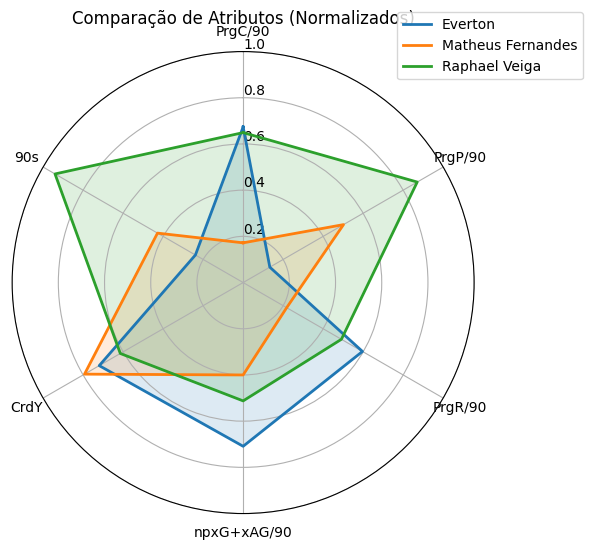

In [12]:
df_mf = df.copy()
df_mf['PrgC/90'] = df_mf['PrgC']/df_mf['90s']
df_mf['PrgP/90'] = df_mf['PrgP']/df_mf['90s']
df_mf['PrgR/90'] = df_mf['PrgR']/df_mf['90s']
df_mf['npxG+xAG/90'] = df_mf['npxG+xAG.1']/df_mf['90s']


numeric_cols = ['PrgC/90', 'PrgP/90', 'PrgR/90', 'npxG+xAG/90', 'CrdY', '90s']
position = 'MF'
target_players = ['Raphael Veiga', 'Everton', 'Matheus Fernandes']


df_selected, df_normalized = filter_and_normalize(df_mf, numeric_cols, position, target_players)

# Verificação crítica dos dados
print("Dados brutos dos jogadores selecionados:")
print(df_selected)

# Verificação dos dados normalizados
print("\nDados normalizados:")
print(df_normalized)

# Radar Plot
categories = numeric_cols
N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]  # Fechar o círculo

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, polar=True)
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories, fontsize=10)
ax.set_rlabel_position(0)
plt.ylim(0, 1)  # Limite fixo

# Plotar cada jogador
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
for idx, (_, row) in enumerate(df_normalized.iterrows()):
    values = row.tolist()
    values += values[:1]  # Repetir o primeiro valor para fechar o gráfico
    ax.plot(angles, values, color=colors[idx], linewidth=2, label=df_selected.iloc[idx]['Player'])
    ax.fill(angles, values, color=colors[idx], alpha=0.15)

plt.title('Comparação de Atributos (Normalizados)', pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.1))
plt.show()


### Escolha dos atributos - Meio-Campistas
Para meio-campistas, optamos pela avaliação de de PrgC/90 (Progressive Carries), PrgP/90 (Progressive Passes) e PrgR/90 (Progressive Passes Received), que fornece uma visão sobre como o jogador contribui para avançar a bola em direção ao ataque, seja carregando, passando ou se posicionando para receber em zonas avançadas. A métrica npxG+xAG/90 avalia a contribuição ofensiva direta (gols e assistências esperados) em jogo corrido, crucial para meio-campistas com chegada à frente. Incluímos CrdY (Cartões Amarelos) para uma dimensão disciplinar, e 90s (minutos jogados) contextualiza o volume de participação do atleta.


### Comparação entre os meio-campistas
Raphael Veiga se destaca claramente como o principal articulador do trio, liderando com folga o percentil de passes progressivos por 90 minutos e acumulando o maior tempo de jogo, indicando seu papel central e constante na construção das jogadas. Everton, apesar do baixíssimo tempo em campo, exibe uma alta capacidade de carregar a bola e surpreendentemente lidera o grupo na taxa de contribuição ofensiva direta, embora seja muito limitado na distribuição progressiva. Matheus Fernandes apresenta um perfil mais discreto ofensivamente, com os menores percentis em condução, recepção de passes progressivos e contribuição para gols/assistências, além de ter o maior índice de cartões amarelos, sugerindo um papel menos focado na progressão e com questões disciplinares, apesar de um tempo de jogo moderado.

## Questão 5
- Faça o mesmo que na questão 3, mas para zagueiros.

Dados brutos dos jogadores selecionados:
               Player   PrgC/90   PrgP/90   PrgR/90  CrdY   xG   90s
110  Juninho Capixaba  1.682692  4.326923  3.509615     4  1.5  20.8
354  Walter Kannemann  0.180180  1.891892  0.000000     7  0.6  11.1
532       Léo Pereira  0.888889  6.311111  1.200000     6  0.7  22.5

Dados normalizados:
      PrgC/90   PrgP/90   PrgR/90      CrdY        xG       90s
110  0.721461  0.753425  0.671233  0.662100  0.885845  0.694064
354  0.136986  0.136986  0.105023  0.899543  0.570776  0.401826
532  0.474886  0.940639  0.502283  0.849315  0.625571  0.730594


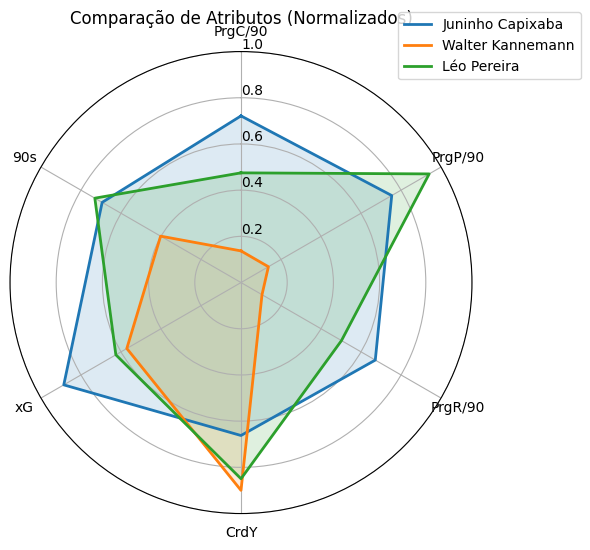

In [13]:

# Definir colunas numéricas com base nos nomes reais (verifique se estão corretos)
df_df = df.copy()
df_df['PrgC/90'] = df_df['PrgC']/df_df['90s']
df_df['PrgP/90'] = df_df['PrgP']/df_df['90s']
df_df['PrgR/90'] = df_df['PrgR']/df_df['90s']

# numeric_cols = ['PrgC/90', 'PrgP/90', 'PrgR/90', 'Starts', 'CrdY', 'xG', '90s']
numeric_cols = ['PrgC/90', 'PrgP/90', 'PrgR/90', 'CrdY', 'xG', '90s']
position = 'DF'
target_players = ['Walter Kannemann', 'Léo Pereira', 'Juninho Capixaba']


df_selected, df_normalized = filter_and_normalize(df_df, numeric_cols, position, target_players)

# --- Verificação crítica dos dados ---
print("Dados brutos dos jogadores selecionados:")
print(df_selected)

# Verificação dos dados normalizados
print("\nDados normalizados:")
print(df_normalized)

# --- Configurar o Radar Plot ---
categories = numeric_cols
N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]  # Fechar o círculo

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, polar=True)
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories, fontsize=10)
ax.set_rlabel_position(0)
plt.ylim(0, 1)  # Limite fixo, mesmo que valores ultrapassem

# Plotar cada jogador
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
for idx, (_, row) in enumerate(df_normalized.iterrows()):
    values = row.tolist()
    values += values[:1]  # Repetir o primeiro valor para fechar o gráfico
    ax.plot(angles, values, color=colors[idx], linewidth=2, label=df_selected.iloc[idx]['Player'])
    ax.fill(angles, values, color=colors[idx], alpha=0.15)

plt.title('Comparação de Atributos (Normalizados)', pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.1))
plt.show()


### Escolha dos atributos - Zagueiros
A seleção de atributos para zagueiros foca em aspectos modernos da posição e em informações contextuais. PrgC/90 e PrgP/90 medem a capacidade do zagueiro de iniciar a construção de jogadas e quebrar linhas adversárias, seja carregando ou passando a bola. PrgR/90 indica o quão avançado no campo o jogador se posiciona para receber passes, relevante para laterais ou zagueiros que participam da construção em zonas mais altas. 90s quantificam a regularidade e o volume de jogo. CrdY oferece uma medida da disciplina tática e agressividade do jogador. Por fim, xG avalia a ameaça ofensiva, geralmente em lances de bola parada, que alguns zagueiros oferecem.

### Comparação entre os zagueiros
Léo Pereira emerge como um zagueiro de destaque na construção, ostentando um percentil excepcional em passes progressivos e alto volume de jogo, embora tenha um índice elevado de cartões. Juninho Capixaba apresenta um perfil mais equilibrado e ofensivo, provavelmente atuando como lateral/ala, com altos percentis em todas as formas de progressão e um notável percentil de gols esperados, combinados com boa regularidade e disciplina razoável. Kannemann, em contraste, demonstra um perfil muito mais defensivo e limitado com a bola, com percentis baixíssimos em todas as métricas de progressão, menor tempo de jogo e o maior índice de cartões amarelos do trio, sugerindo um zagueiro mais tradicional, focado na destruição e com pouca participação na saída de bola.

## Questão 6
- Discuta as diferenças entre os radares das questões 3, 4 e 5. Quais são as principais diferenças entre os atributos relevantes para cada posição? Quais são as principais semelhanças? A impressão subjetiva que você tinha dos jogadores se comprovou pelos radares? Se não, por quê? Quais posições são mais difíceis de serem avaliadas por estatísticas?

### Comparação radares atacantes, meio-campistas e zagueiros

Os radares destacam como os atributos relevantes variam por posição: atacantes são primariamente avaliados pela produção ofensiva direta, meio-campistas pela capacidade de construção e progressão, enquanto zagueiros modernos também são analisados por sua contribuição na saída de bola além de aspectos defensivos e disciplinares. Contudo, métricas de progressão e a necessidade de contextualizar pelo volume de jogo são semelhanças transversais, e a normalização por percentil permitiu uma comparação relativa eficaz dentro de cada grupo posicional.

Embora os radares frequentemente confirmem impressões subjetivas (como Veiga sendo um grande passador ou Kannemann limitado com a bola), eles adicionam nuances e objetividade, por vezes desafiando a percepção geral (como a contribuição relativa de Hulk em jogo corrido vs. Yuri Alberto dentro deste grupo). As estatísticas podem não capturar totalmente a complexidade de certas funções, sendo as posições defensivas as mais desafiadoras, pois muitas contribuições cruciais são menos tangíveis para dados de eventos diretos, ao contrário das ações mais quantificáveis dos jogadores ofensivos.